## Track reconstruction figures

In [1]:
# %matplotlib notebook
%load_ext autoreload
%autoreload 1
import pyphysics as phys
from pyphysics.actroot_interface import TPCInterface
import hist
import uproot
import ROOT as r
import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib.axes as mplaxes
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mpltick

import sys

sys.path.append("../")
import styling as sty

### 3D event with projections

In [2]:
tpcdata = r.TFile("../Code/Events/run_155_entry_1296.root").Get("TPCData") #type: ignore
ev = TPCInterface(tpcdata)

### Contest to select event appearing in thesis

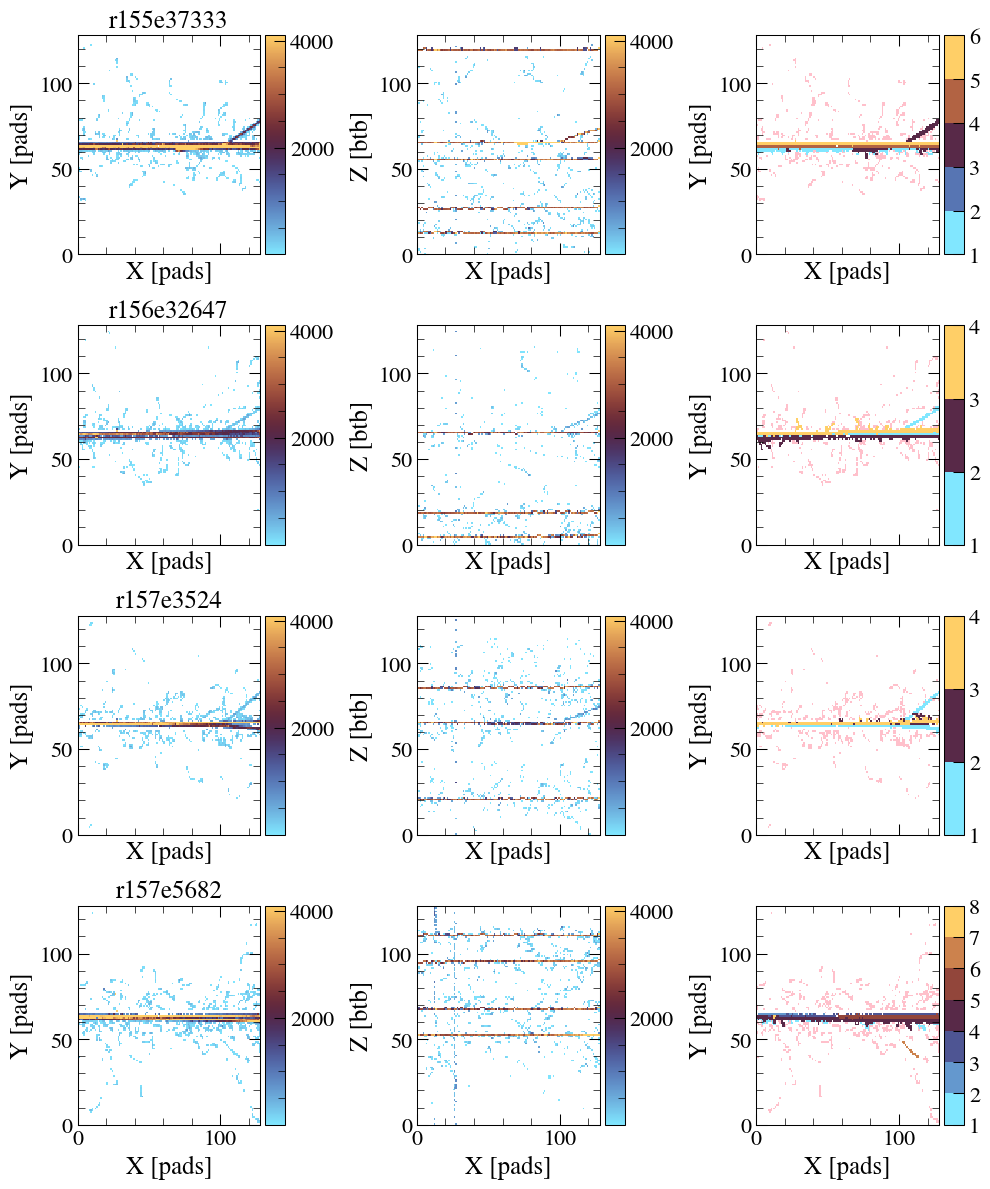

In [3]:
runentry = [(155, 37333), (156, 32647), (157, 3524), (157, 5682)]
evs = []
for run, entry in runentry:
    file = r.TFile(f"../Code/Events/run_{run}_entry_{entry}.root") #type: ignore
    evs.append(TPCInterface(file.Get("TPCData")))

fig, axs = plt.subplots(len(evs), 3, figsize=(10, 12), sharex=True)

for i, ev in enumerate(evs):
    ax: mplaxes.Axes = axs[i, 0]
    ev.plot("xy", ax=ax)
    ax.set_title(f"r{runentry[i][0]}e{runentry[i][1]}")
    ax: mplaxes.Axes = axs[i, 1]
    ev.plot("xz", ax=ax)
    ax = axs[i, 2]
    ev.plot("xy", isCluster=True, withNoise=True, ax=ax)

fig.tight_layout()

We will choose r157 e3524

In [4]:
ev = evs[2]

### Continuity example

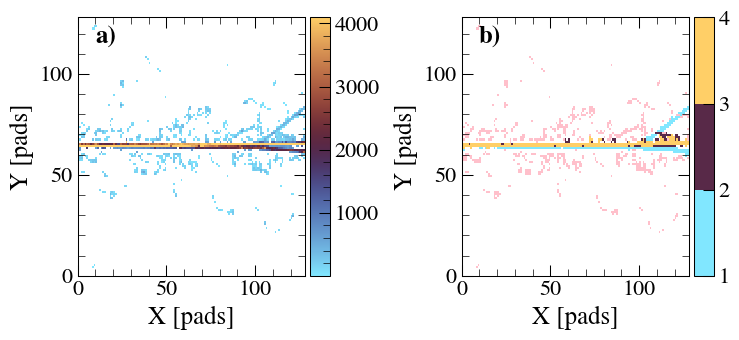

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.5))
# Raw content
ax: mplaxes.Axes = axs[0]
ev.plot(ax=ax, cbar=True)

# Cluster
ax = axs[1]
plt.sca(ax)
ev.plot(ax=ax, proj="xy", isCluster=True, withNoise=True)

phys.utils.annotate_subplots(axs)
fig.tight_layout()
fig.savefig(sty.thesis + "continuity.pdf", dpi=300)

### Filtering

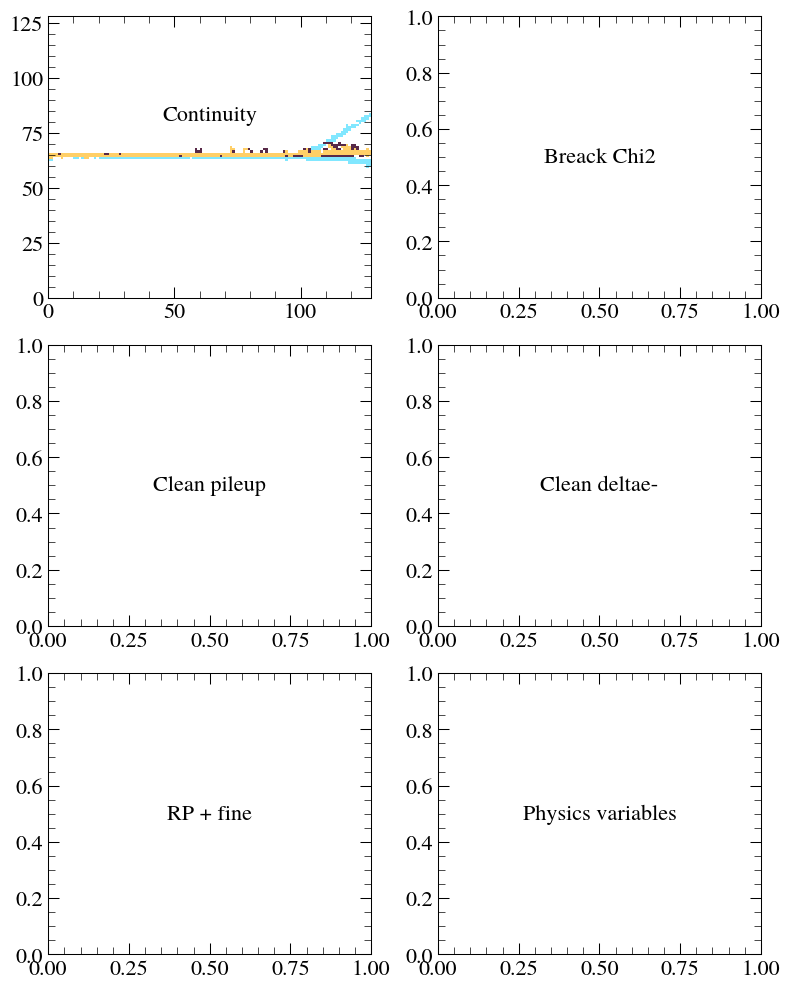

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

# Starting point
ax: mplaxes.Axes = axs[0, 0]
ev.plot(ax=ax, isCluster=True, cbar=False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.annotate("Continuity", xy=(0.5, 0.65), xycoords="axes fraction", ha="center", va="center", fontsize=16)

# Break chi2
ax = axs[0, 1]
ax.annotate("Breack Chi2", xy=(0.5, 0.5), ha="center", va="center", fontsize=16)

# Clean pileup
ax = axs[1, 0]
ax.annotate("Clean pileup", xy=(0.5, 0.5), ha="center", va="center", fontsize=16)

# Clean delta
ax = axs[1, 1]
ax.annotate("Clean deltae-", xy=(0.5, 0.5), ha="center", va="center", fontsize=16)

# RP
ax = axs[2, 0]
ax.annotate("RP + fine", xy=(0.5, 0.5), ha="center", va="center", fontsize=16)

# Physics
ax = axs[2, 1]
ax.annotate("Physics variables", xy=(0.5, 0.5), ha="center", va="center", fontsize=16)

fig.tight_layout()
fig.savefig(sty.thesis + "filtering.pdf", dpi=300)